<h1>CASE STUDY ON REGRESSION</h1>

<pre>The given dataset contains the price of a second-hand Hyundai grand i10 car
with respect to year of making. Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.</pre>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

<Axes: >

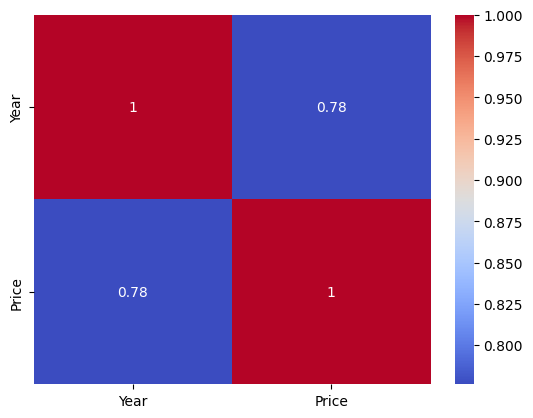

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

PREPROCESSING

<Axes: ylabel='Price'>

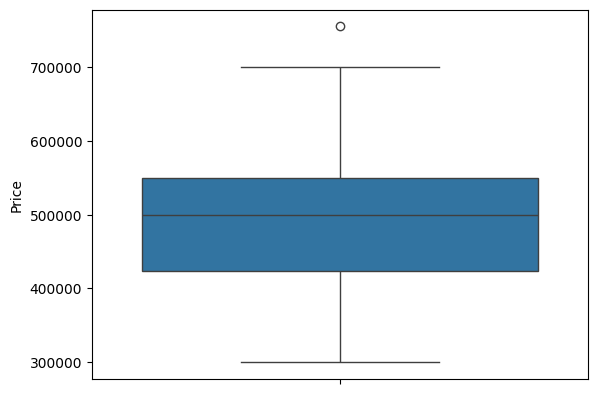

In [8]:
sns.boxplot(data['Price'])

In [9]:
q1=np.percentile(data['Price'],25)
q3=np.percentile(data['Price'],75)
iqr=q3-q1
upper=q3+iqr*1.5
lower=q1-iqr*1.5
print(upper)
print(lower)

739375.0
234375.0


In [10]:
outliers_index=data[(data['Price']>upper)| (data['Price']<lower) ].index

In [11]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [12]:
data.drop(outliers_index,inplace=True)

In [13]:
data

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


<Axes: ylabel='Price'>

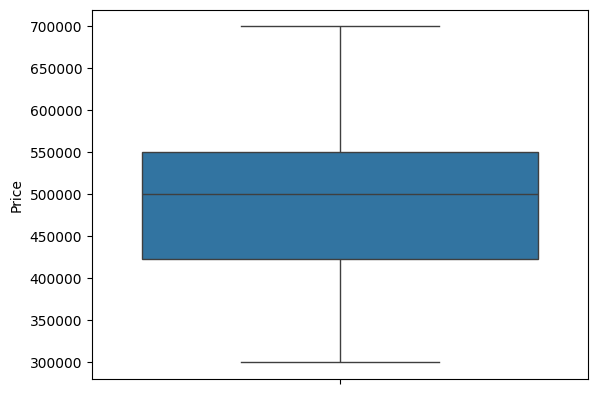

In [14]:
sns.boxplot(data['Price'])

In [15]:
X=data[['Year']]
y=data['Price']

In [16]:
print(X.shape)
print(y.shape)

(111, 1)
(111,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

LINEAR REGRESSION

In [18]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)


In [19]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error

print("mean_absolute_error".upper(),"                   :",mean_absolute_error(y_test,y_pred)) 
print("root_mean_squared_error".upper(),"               :",root_mean_squared_error(y_test,y_pred))
print("r2_score".upper(),"                              :",r2_score(y_test,y_pred))
print("mean_absolute_percentage_error".upper(),"        :",mean_absolute_percentage_error(y_test,y_pred))

MEAN_ABSOLUTE_ERROR                    : 41925.8575607799
ROOT_MEAN_SQUARED_ERROR                : 52142.31068020094
R2_SCORE                               : 0.6727697922779439
MEAN_ABSOLUTE_PERCENTAGE_ERROR         : 0.10187968071659102


In [20]:
X_test.shape

(28, 1)

In [21]:
pred_val=lr_model.predict([[2022]])

f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
print(f"POSSBLE PRICE OF A 2022 MODEL SECOND_HAND GRAND i10  : {pred_val[0]}")

POSSBLE PRICE OF A 2022 MODEL SECOND_HAND GRAND i10  : 698523.0518221408


<i><h4>AS PER LINEAR REGRESSION
<h4>POSSIBLE PRICE PREDICTED FOR A 2022 MODEL SECONDHAND GRAND i10  : <b>698523.0518221408</b></h4></i>

LASSO REGRESSION

In [23]:
from sklearn.linear_model import Lasso

lasso_model=Lasso()
lasso_model.fit(X_train,y_train)
lasso_y_pred=lasso_model.predict(X_test)

In [24]:
print("mean_absolute_error".upper(),"                   :",mean_absolute_error(y_test,lasso_y_pred)) 
print("root_mean_squared_error".upper(),"               :",root_mean_squared_error(y_test,lasso_y_pred))
print("r2_score".upper(),"                              :",r2_score(y_test,lasso_y_pred)) 
print("mean_absolute_percentage_error".upper(),"        :",mean_absolute_percentage_error(y_test,lasso_y_pred))

MEAN_ABSOLUTE_ERROR                    : 41926.03231918067
ROOT_MEAN_SQUARED_ERROR                : 52142.495783258106
R2_SCORE                               : 0.6727674689662775
MEAN_ABSOLUTE_PERCENTAGE_ERROR         : 0.10188018031984222


In [25]:
lasso_pred_val=lasso_model.predict([[2022]])

f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [26]:
print(f"POSSBLE PRICE OF A 2022 MODEL SECOND_HAND GRAND i10  : {lasso_pred_val[0]}")

POSSBLE PRICE OF A 2022 MODEL SECOND_HAND GRAND i10  : 698521.0075782835


<i><h4>AS PER LASSO REGRESSION
<h4>POSSIBLE PRICE PREDICTED FOR A 2022 MODEL SECONDHAND GRAND i10  : <b>698521.0075782835</b></h4></i>